In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [25]:
df = pd.read_csv("C:/baseball_players.csv")

In [26]:
df

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [27]:
df.columns

Index(['Name', 'Team', 'Position', 'Height(inches)', 'Weight(pounds)', 'Age'], dtype='object')

In [28]:
df.dtypes

Name               object
Team               object
Position           object
Height(inches)      int64
Weight(pounds)    float64
Age               float64
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1034 non-null   object 
 1   Team            1034 non-null   object 
 2   Position        1034 non-null   object 
 3   Height(inches)  1034 non-null   int64  
 4   Weight(pounds)  1033 non-null   float64
 5   Age             1034 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 48.6+ KB


In [31]:
df.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

<AxesSubplot:xlabel='Position', ylabel='count'>

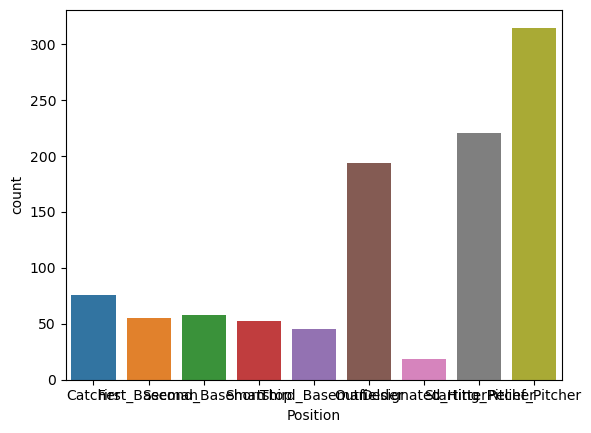

In [35]:
sns.countplot(data = df, x="Position")

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [37]:
df

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,12,3,0,7,15,35
1,794,3,0,7,50,625
2,817,3,0,5,45,482
3,628,3,2,5,45,645
4,199,3,2,6,23,653
...,...,...,...,...,...,...
1029,105,25,4,6,25,145
1030,997,25,4,7,15,190
1031,202,25,4,8,40,153
1032,824,25,4,8,25,496


In [55]:
data = df.iloc[:, [0, 1, 3, 4, 5]]
label = df.iloc[:, [2]]

In [56]:
data

,Name,Team,Height(inches),Weight(pounds),Age
0,12,3,7,15,35
1,794,3,7,50,625
2,817,3,5,45,482
3,628,3,5,45,645
4,199,3,6,23,653
...,...,...,...,...,...
1029,105,25,6,25,145
1030,997,25,7,15,190
1031,202,25,8,40,153
1032,824,25,8,25,496


In [57]:
label

,Position
0,0
1,0
2,0
3,2
4,2
...,...
1029,4
1030,4
1031,4
1032,4


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)

In [59]:
print("X_train.shape:", X_train.shape)

print("y_train.shape:", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape: (827, 5)
y_train.shape: (827, 1)
X_test.shape: (207, 5)
y_test.shape: (207, 1)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
'''lr = LinearRegression()

lr.fit(X_train, y_train)'''

LinearRegression()

In [62]:
'''print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값'''

회귀계수(기울기): [[-0.   0.   0.2 -0.  -0. ]]
상수항(절편): [4.3]


In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.1653018832205504


In [64]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 3.1176604631173395


In [65]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

C:\Users\82109\AppData\Local\Temp\ipykernel_22464\2598147506.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


평균제곱근오차 2.267399817492969


In [66]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.1865299837236853


C:\Users\82109\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
